<h2>209 - Uswatun Khasanah<h2>

Code di bawah ini merupakan kerangka pengerjaan untuk clustering. Perbaiki dan lengkapi agar bisa berjalan tanpa error.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import library yang dibutuhkan

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

2. Tampilkan dataset

In [ ]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/Penggalian Data/Modul 5/data_pelanggan.csv')

3. Lakukan EDA secukupnya

In [ ]:
# Hitung dan cetak jumlah pelanggan berdasarkan jenis kelamin
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


4. Buat visualisasi data

Text(0, 0.5, 'Jumlah Pelanggan')

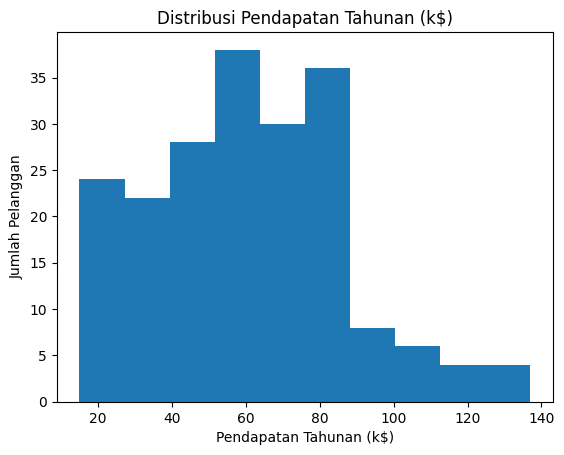

In [ ]:
# Buat histogram untuk pendapatan tahunan
plt.hist(df['Annual Income (k$)'], bins=10)
plt.title('Distribusi Pendapatan Tahunan (k$)')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Jumlah Pelanggan')

5. Preprocessing Data

In [ ]:
# Tips: Gunakan pd.get_dummies() untuk one hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'])
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [ ]:
#Normalisasi Data: Usia, Pendapatan Tahunan, dan Skor Pengeluaran
scaler = MinMaxScaler()
df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,0.019231,0.000000,0.387755,False,True
1,2,0.057692,0.000000,0.816327,False,True
2,3,0.038462,0.008197,0.051020,True,False
3,4,0.096154,0.008197,0.775510,True,False
4,5,0.250000,0.016393,0.397959,True,False
...,...,...,...,...,...,...
195,196,0.326923,0.860656,0.795918,True,False
196,197,0.519231,0.909836,0.275510,True,False
197,198,0.269231,0.909836,0.744898,False,True
198,199,0.269231,1.000000,0.173469,False,True


6. Penerapan K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

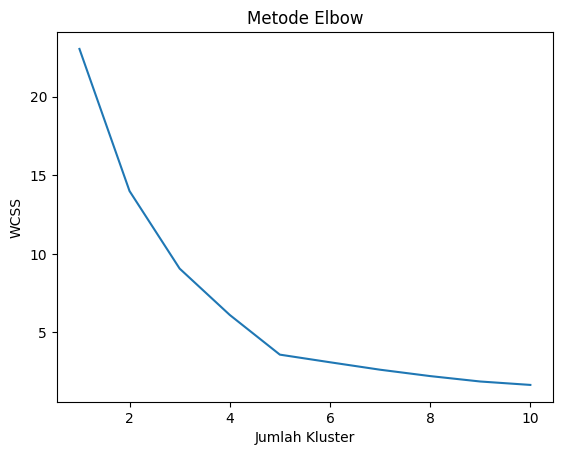

In [ ]:
# Gunakan metode Elbow untuk menentukan jumlah kluster yang ideal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


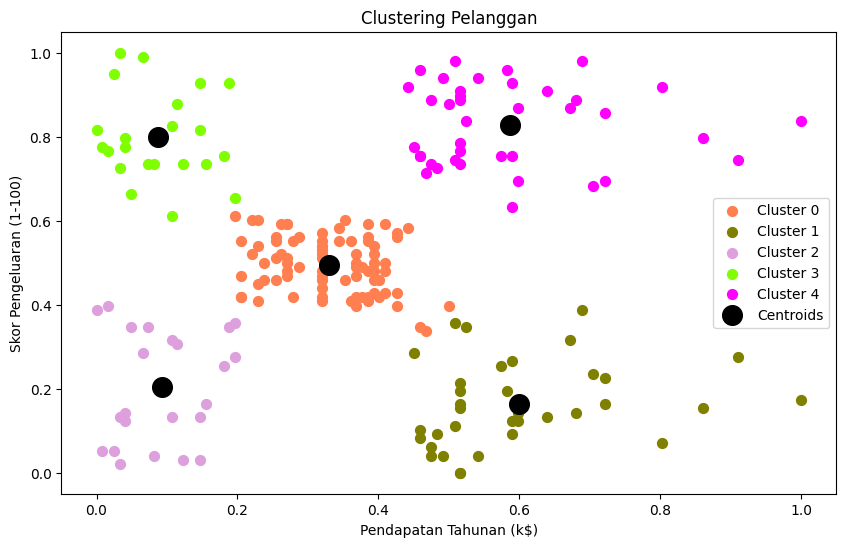

In [ ]:
#Lanjutkan proses clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(10, 6))
colors = ['coral', 'olive', 'plum', 'chartreuse', 'magenta']
for i in range(5):
    plt.scatter(df_encoded[df_encoded['Cluster'] == i]['Annual Income (k$)'],
                df_encoded[df_encoded['Cluster'] == i]['Spending Score (1-100)'],
                s=50, c=colors[i], label='Cluster '+str(i))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clustering Pelanggan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend()
plt.show()


7. Interpretasi Kluster

Setelah menentukan jumlah kluster, lakukan analisis untuk memahami karakteristik dari setiap kluster

In [ ]:
cluster_characteristics = df_encoded.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender_Female': 'mean',
    'Gender_Male': 'mean'
}).reset_index()

print(cluster_characteristics)


   Cluster       Age  Annual Income (k$)  Spending Score (1-100)  \
0        0  0.407692            0.272623                0.566122   
1        1  0.282544            0.586381                0.827839   
2        2  0.430668            0.590164                0.179914   
3        3  0.523411            0.092659                0.203194   

   Gender_Female  Gender_Male  
0       0.590000     0.410000  
1       0.538462     0.461538  
2       0.473684     0.526316  
3       0.608696     0.391304  
